In [80]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:

# CSV files
bom_movie_gross = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\bom.movie_gross.csv', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\tmdb.movies.csv', encoding='ISO-8859-1')
tn_movie_budgets = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\tn.movie_budgets.csv', encoding='ISO-8859-1')

# TSV files
rt_movie_info = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\rt.movie_info.tsv', sep='\t', encoding='ISO-8859-1')
rt_reviews = pd.read_csv(r'E:\moringa school\phase_2\Group7_Phase_2_Project\data\rt.reviews.tsv', sep='\t', encoding='ISO-8859-1')


In [98]:
# Connect to the SQLite database
conn = sqlite3.connect(r"E:\moringa school\phase_2\Group7_Phase_2_Project\data\im.db")


In [100]:
# Get table names
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

tables=pd.read_sql(table_name_query, conn)
tables

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [102]:
# Explore movie_basics table
movie_basics = pd.read_sql("""
SELECT * FROM movie_basics LIMIT 5;
""", conn)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [104]:
movie_basics = pd.read_sql("""
SELECT * FROM known_for LIMIT 5;
""", conn)
movie_basics

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [54]:
# Explore movie_ratings table
movie_ratings = pd.read_sql("""
SELECT * FROM movie_ratings LIMIT 5;
""", conn)

movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [64]:
# Loop through each table name
for table in tables['Table Names']:
    # Query to get the data from the current table
    query = f"SELECT * FROM {table};"
    
    # Load the data into a DataFrame
    df = pd.read_sql(query, conn)

for table, df in dfs.items():
    print(f"Data for table: {table}")
    print(df.head())  # Print the first few rows of the DataFrame



Data for table: movie_basics
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
Data for table: directors
    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502
Data for

In [110]:
# Merge movie_basics and directors on 'movie_id'
merged_df = pd.merge(dfs['movie_basics'], dfs['directors'], on='movie_id', how='left')
print(merged_df.head())


    movie_id                    primary_title   original_title  start_year  \
0  tt0063540                        Sunghursh        Sunghursh        2013   
1  tt0063540                        Sunghursh        Sunghursh        2013   
2  tt0063540                        Sunghursh        Sunghursh        2013   
3  tt0063540                        Sunghursh        Sunghursh        2013   
4  tt0066787  One Day Before the Rainy Season  Ashad Ka Ek Din        2019   

   runtime_minutes              genres  person_id  
0            175.0  Action,Crime,Drama  nm0712540  
1            175.0  Action,Crime,Drama  nm0712540  
2            175.0  Action,Crime,Drama  nm0712540  
3            175.0  Action,Crime,Drama  nm0712540  
4            114.0     Biography,Drama  nm0002411  


In [116]:
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13 = all_dfs

NameError: name 'all_dfs' is not defined

In [114]:
# columns for each
for i, df in enumerate(all_dfs):
    print(f"\nDataFrame {i+1} Columns:")
    print(df.columns.tolist())


NameError: name 'all_dfs' is not defined

In [206]:
# Merge DF1 and DF2 (on 'title')
movies_title = pd.concat([df1, df2], ignore_index=True)
movies_title

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
6769,The Quake,Magn.,6200.0,NaN,2018
6770,Edward II (2018 re-release),FM,4800.0,NaN,2018
6771,El Pacto,Sony,2500.0,NaN,2018
6772,The Swan,Synergetic,2400.0,NaN,2018


In [207]:
# Merge DF3 and DF4 (on 'id')
movies_info = pd.merge(df3, df4, on='id', how='inner')
movies_info

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926",Nicolas Cage headlines this high-octane thrill...,R,Action and Adventure|Mystery and Suspense,Patrick Lussier,NaN,"Feb 25, 2011","May 31, 2011",$,"10,706,786",107 minutes,Summit Entertainment
4678,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,"Jul 1, 2011","Nov 15, 2011",$,"35,565,975",99 minutes,Universal Pictures
4679,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",A somber portrait of organized crime and famil...,R,Action and Adventure|Drama|Mystery and Suspense,James Gray,James Gray,"May 19, 1995","Mar 16, 1999",NaN,NaN,98 minutes,NaN
4680,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",When Francisco Manoel de Silva (Klaus Kinski) ...,NR,Action and Adventure|Art House and Internation...,Werner Herzog,Werner Herzog,"Dec 3, 1987","Oct 24, 2000",NaN,NaN,110 minutes,NaN


In [208]:
# Merge reviews (df5) into the movies_info
movies_full = pd.merge(movies_info, df5, on='id', how='left')  # left join because not all movies may have reviews
movies_full

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,synopsis,rating_x,genre,director,...,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279","This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,...,NaN,104 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,...,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,...,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018"
3,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,...,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018"
4,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,...,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186309,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041",Donnie (Jake Gyllenhaal) is a bright and charm...,R,Comedy|Mystery and Suspense|Science Fiction an...,Richard Kelly,...,NaN,113 minutes,Newmarket Film Group,"A mish-mash of disparate, non-cohesive ideas, ...",C-,rotten,Eric D. Snider,0.0,EricDSnider.com,"February 13, 2001"
186310,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041",Donnie (Jake Gyllenhaal) is a bright and charm...,R,Comedy|Mystery and Suspense|Science Fiction an...,Richard Kelly,...,NaN,113 minutes,Newmarket Film Group,"It works simultaneously as character study, te...",8/10,fresh,Johan De,0.0,Future Movies UK,"January 19, 2001"
186311,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041",Donnie (Jake Gyllenhaal) is a bright and charm...,R,Comedy|Mystery and Suspense|Science Fiction an...,Richard Kelly,...,NaN,113 minutes,Newmarket Film Group,"It is fascinating, lyrical filmmaking and it d...",3/4,fresh,Robert Roten,0.0,Laramie Movie Scope,"January 1, 2001"
186312,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041",Donnie (Jake Gyllenhaal) is a bright and charm...,R,Comedy|Mystery and Suspense|Science Fiction an...,Richard Kelly,...,NaN,113 minutes,Newmarket Film Group,NaN,3/4,fresh,Peter Travers,1.0,Rolling Stone,"August 14, 2007"


In [209]:
# Merge or concatenate DF6 to DF13 (all people data)
persons = pd.concat([df6, df7, df8, df9, df10, df11, df12, df13], ignore_index=True)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
4853179,nm9990381,Susan Grobes,NaN,NaN,actress
4853180,nm9990690,Joo Yeon So,NaN,NaN,actress
4853181,nm9991320,Madeline Smith,NaN,NaN,actress
4853182,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [210]:
# Add a clean version of title and movie
movies_title['title_clean'] = movies_title['title'].str.lower().str.strip()
movies_full['movie_clean'] = movies_full['movie'].str.lower().str.strip()

# Merge on the cleaned titles
final_movies = pd.merge(movies_title, movies_full, left_on='title_clean', right_on='movie_clean', how='inner')
final_movies.head(20)


,title,studio_x,domestic_gross_x,foreign_gross,year,title_clean,id,release_date,movie,production_budget,...,runtime,studio_y,review,rating_y,fresh,critic,top_critic,publisher,date,movie_clean
0,Inception,WB,292600000.0,535700000,2010,inception,38,"Jul 16, 2010",Inception,"$160,000,000",...,96 minutes,NaN,This ranks as one of Hammer's greatest ever.,8/10,fresh,John Higgins,0.0,Starburst,"November 9, 2017",inception
1,Inception,WB,292600000.0,535700000,2010,inception,38,"Jul 16, 2010",Inception,"$160,000,000",...,96 minutes,NaN,A rattling collection of warmed-over ideas fil...,4/10,rotten,Tim Brayton,0.0,Antagony &amp; Ecstasy,"October 21, 2008",inception
2,Inception,WB,292600000.0,535700000,2010,inception,38,"Jul 16, 2010",Inception,"$160,000,000",...,96 minutes,NaN,Yet another Chris Lee Dracula picture,2/5,rotten,Ken Hanke,0.0,"Mountain Xpress (Asheville, NC)","August 7, 2002",inception
3,Inception,WB,292600000.0,535700000,2010,inception,38,"Jul 16, 2010",Inception,"$160,000,000",...,96 minutes,NaN,NaN,2.5/5,rotten,Jennie Kermode,0.0,Eye for Film,"April 18, 2011",inception
4,Inception,WB,292600000.0,535700000,2010,inception,38,"Jul 16, 2010",Inception,"$160,000,000",...,96 minutes,NaN,NaN,6,rotten,Jeremy Heilman,0.0,Apollo Guide,"January 12, 2002",inception
5,Shrek Forever After,P/DW,238700000.0,513900000,2010,shrek forever after,27,"May 21, 2010",Shrek Forever After,"$165,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shrek forever after
6,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,the twilight saga: eclipse,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000",...,112 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the twilight saga: eclipse
7,Iron Man 2,Par.,312400000.0,311500000,2010,iron man 2,15,"May 7, 2010",Iron Man 2,"$170,000,000",...,108 minutes,NaN,Congo falls short on its cinematic impact.,NaN,rotten,Marisa Mirabal,0.0,Birth.Movies.Death.,"August 3, 2018",iron man 2
8,Iron Man 2,Par.,312400000.0,311500000,2010,iron man 2,15,"May 7, 2010",Iron Man 2,"$170,000,000",...,108 minutes,NaN,"It's a shocker: clunkingly written, dismally a...",NaN,rotten,Quentin Curtis,0.0,Independent on Sunday,"December 13, 2017",iron man 2
9,Iron Man 2,Par.,312400000.0,311500000,2010,iron man 2,15,"May 7, 2010",Iron Man 2,"$170,000,000",...,108 minutes,NaN,"A goofy mess whose screws aren't loose, but mi...",3/5,fresh,NaN,0.0,Cinemixtape,"April 9, 2016",iron man 2


In [211]:
final_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80140 entries, 0 to 80139
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              80140 non-null  object 
 1   studio_x           79930 non-null  object 
 2   domestic_gross_x   80138 non-null  float64
 3   foreign_gross      68148 non-null  object 
 4   year               80140 non-null  int64  
 5   title_clean        80140 non-null  object 
 6   id                 80140 non-null  int64  
 7   release_date       80140 non-null  object 
 8   movie              80140 non-null  object 
 9   production_budget  80140 non-null  object 
 10  domestic_gross_y   80140 non-null  object 
 11  worldwide_gross    80140 non-null  object 
 12  synopsis           76998 non-null  object 
 13  rating_x           77044 non-null  object 
 14  genre              77044 non-null  object 
 15  director           63592 non-null  object 
 16  writer             578

In [212]:
final_movies.describe()

,domestic_gross_x,year,id,top_critic
count,8.013800e+04,80140.000000,80140.000000,79560.000000
mean,6.078773e+07,2013.487472,47.667507,0.247335
std,8.461903e+07,2.562620,28.618889,0.431466
min,8.000000e+02,2010.000000,1.000000,0.000000
25%,5.700000e+06,2011.000000,23.000000,0.000000
50%,3.240000e+07,2013.000000,52.000000,0.000000
75%,8.010000e+07,2016.000000,70.000000,0.000000
max,7.001000e+08,2018.000000,100.000000,1.000000


In [213]:
final_movies.isna().sum()

title                    0
studio_x               210
domestic_gross_x         2
foreign_gross        11992
year                     0
title_clean              0
id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross_y         0
worldwide_gross          0
synopsis              3142
rating_x              3096
genre                 3096
director             16548
writer               22324
theater_date          5466
dvd_date              5466
currency             35502
box_office           35502
runtime               3156
studio_y             24858
review               10332
rating_y             19288
fresh                  580
critic                4190
top_critic             580
publisher              882
date                   580
movie_clean              0
dtype: int64

In [214]:
final_movies.columns

Index(['title', 'studio_x', 'domestic_gross_x', 'foreign_gross', 'year',
       'title_clean', 'id', 'release_date', 'movie', 'production_budget',
       'domestic_gross_y', 'worldwide_gross', 'synopsis', 'rating_x', 'genre',
       'director', 'writer', 'theater_date', 'dvd_date', 'currency',
       'box_office', 'runtime', 'studio_y', 'review', 'rating_y', 'fresh',
       'critic', 'top_critic', 'publisher', 'date', 'movie_clean'],
      dtype='object')

In [215]:
# Drop unnecessary columns
columns_to_drop = ['synopsis', 'studio_x', 'studio_y', 'writer', 'director', 
                   'currency', 'box_office', 'review', 'rating_y', 'fresh', 
                   'top_critic', 'critic', 'publisher', 'date', 
                   'title_clean', 'movie_clean', 'movie', 'id']
final_movies = final_movies.drop(columns=columns_to_drop)

In [216]:
# Fill missing foreign/domestic gross with 0
final_movies['foreign_gross'] = final_movies['foreign_gross'].fillna(0)
final_movies['domestic_gross_x'] = final_movies['domestic_gross_x'].fillna(0)

In [217]:
# Drop rows where production_budget or genre is missing
final_movies = final_movies.dropna(subset=['production_budget', 'genre'])

In [218]:
# Fill missing rating if needed
final_movies['rating_x'] = final_movies['rating_x'].fillna('Unknown')


In [219]:
final_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77044 entries, 0 to 80139
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              77044 non-null  object 
 1   domestic_gross_x   77044 non-null  float64
 2   foreign_gross      77044 non-null  object 
 3   year               77044 non-null  int64  
 4   release_date       77044 non-null  object 
 5   production_budget  77044 non-null  object 
 6   domestic_gross_y   77044 non-null  object 
 7   worldwide_gross    77044 non-null  object 
 8   rating_x           77044 non-null  object 
 9   genre              77044 non-null  object 
 10  theater_date       74674 non-null  object 
 11  dvd_date           74674 non-null  object 
 12  runtime            76984 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 8.2+ MB


In [220]:
# Check for duplicate movie titles
final_movies.duplicated(subset=['title']).sum()


np.int64(76030)

In [221]:
final_movies.columns

Index(['title', 'domestic_gross_x', 'foreign_gross', 'year', 'release_date',
       'production_budget', 'domestic_gross_y', 'worldwide_gross', 'rating_x',
       'genre', 'theater_date', 'dvd_date', 'runtime'],
      dtype='object')

In [222]:
# Correct cleaning with raw string
cols_to_clean = ['production_budget', 'domestic_gross_x', 'foreign_gross', 'worldwide_gross']

for col in cols_to_clean:
    final_movies[col] = final_movies[col].replace(r'[\$,]', '', regex=True).astype(float)


In [223]:
# Clean the runtime column: remove "minutes" and convert to float
final_movies['runtime'] = final_movies['runtime'].str.replace('minutes', '').str.strip().astype(float)


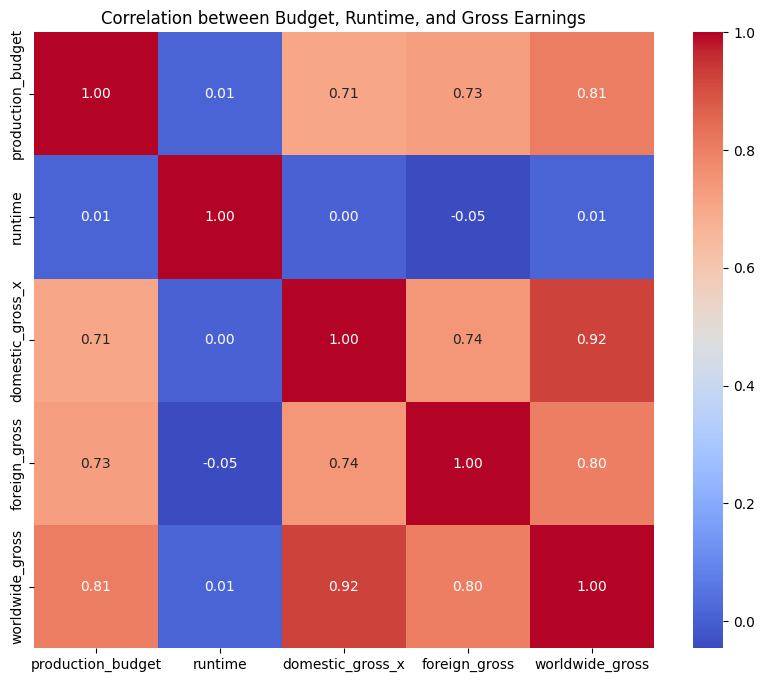

In [224]:
# correlation map
numeric_cols = ['production_budget', 'runtime', 'domestic_gross_x', 'foreign_gross', 'worldwide_gross']
corr_matrix = final_movies[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Budget, Runtime, and Gross Earnings')
plt.show()


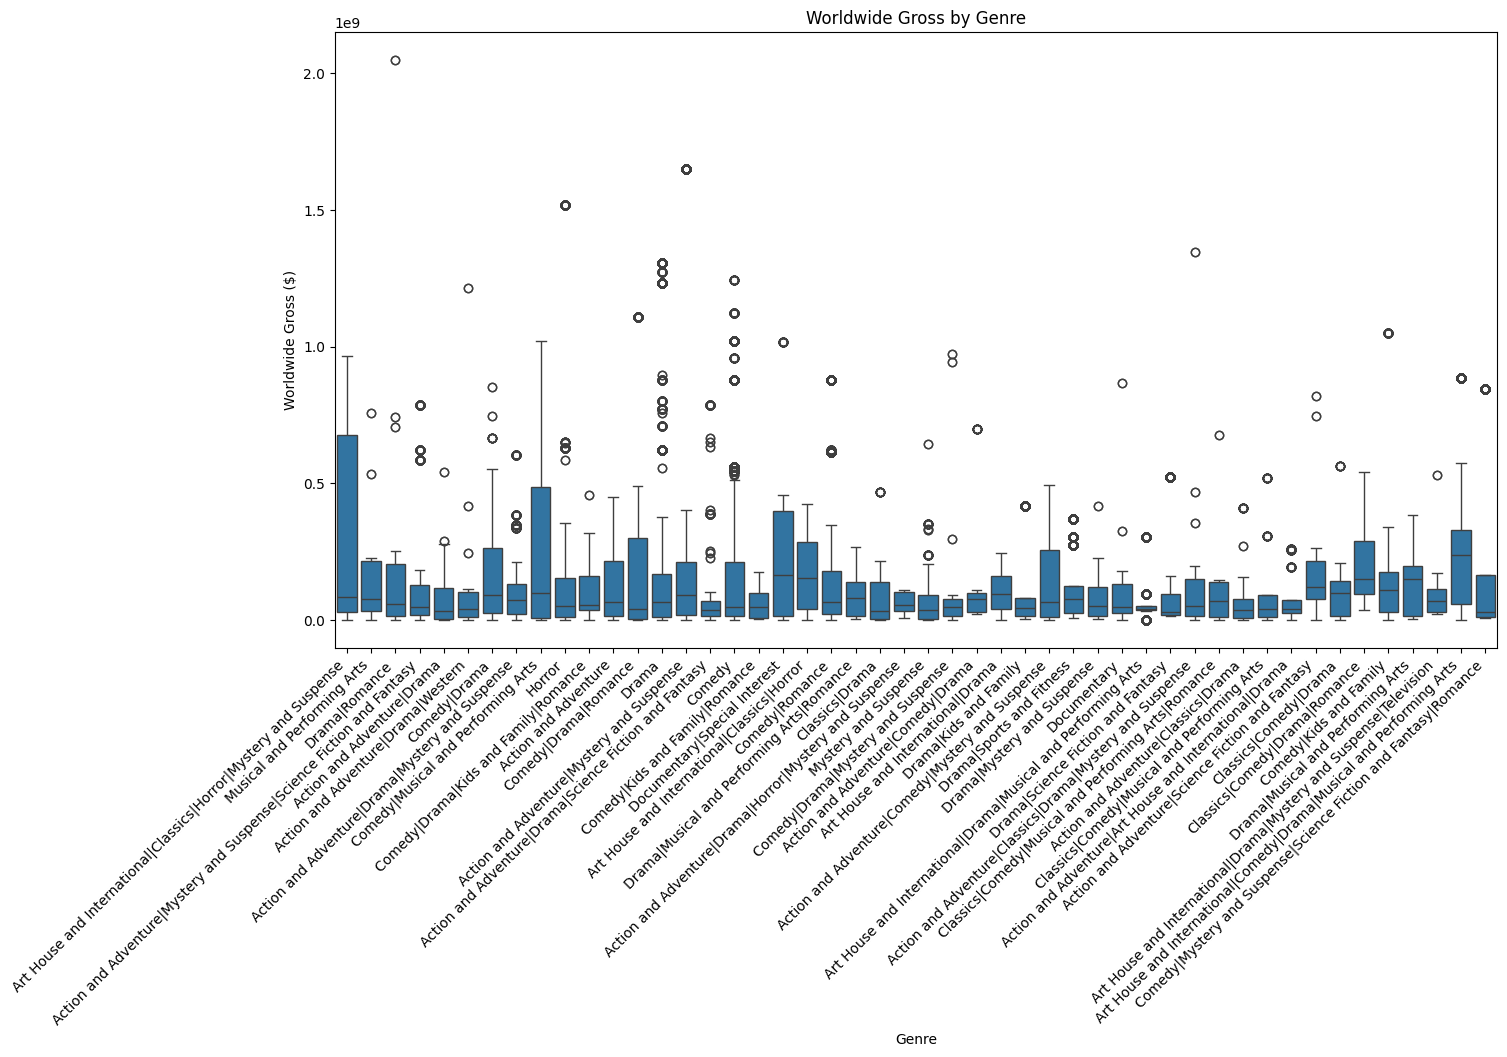

In [225]:
# Boxplot: Genre vs Worldwide Gross
plt.figure(figsize=(15,8))
sns.boxplot(data=final_movies, x='genre', y='worldwide_gross')
plt.xticks(rotation=45, ha='right')
plt.title('Worldwide Gross by Genre')
plt.ylabel('Worldwide Gross ($)')
plt.xlabel('Genre')
plt.show()


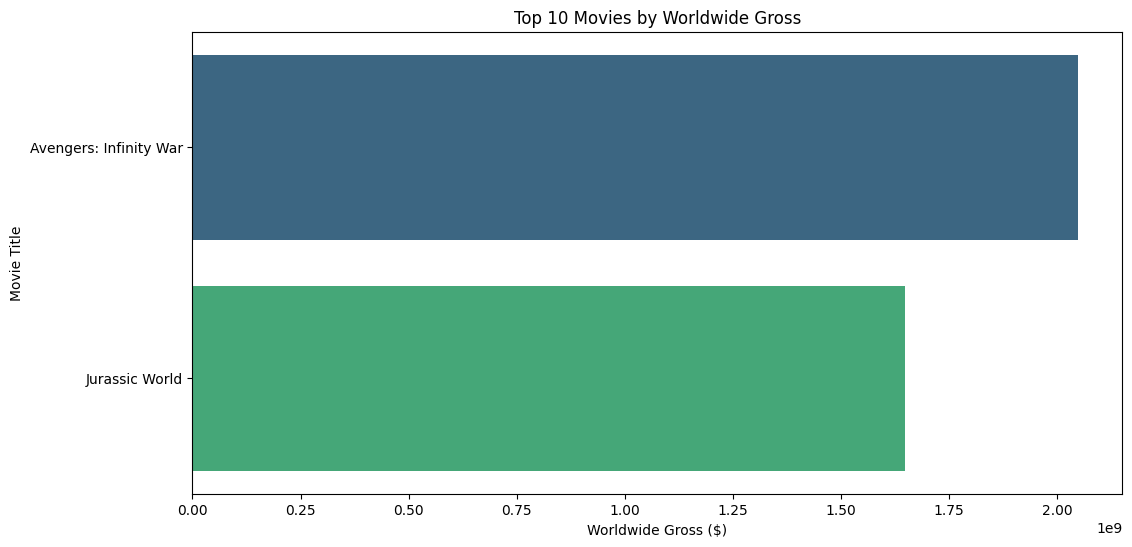

In [226]:
# Sort movies by worldwide gross
top_10_movies = final_movies.sort_values('worldwide_gross', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(
    x='worldwide_gross',
    y='title',
    data=top_10_movies,
    hue='title',         # <--- add this
    dodge=False,
    palette='viridis',
    legend=False         # <--- because now hue will normally create a legend
)
plt.title('Top 10 Movies by Worldwide Gross')
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Movie Title')
plt.show()


# Top genres by profit
### Objective: Find out which movie genres are the most profitable.


C:\Users\Admin\AppData\Local\Temp\ipykernel_13340\620876039.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_profit.index, y=genre_profit.values, palette='viridis')


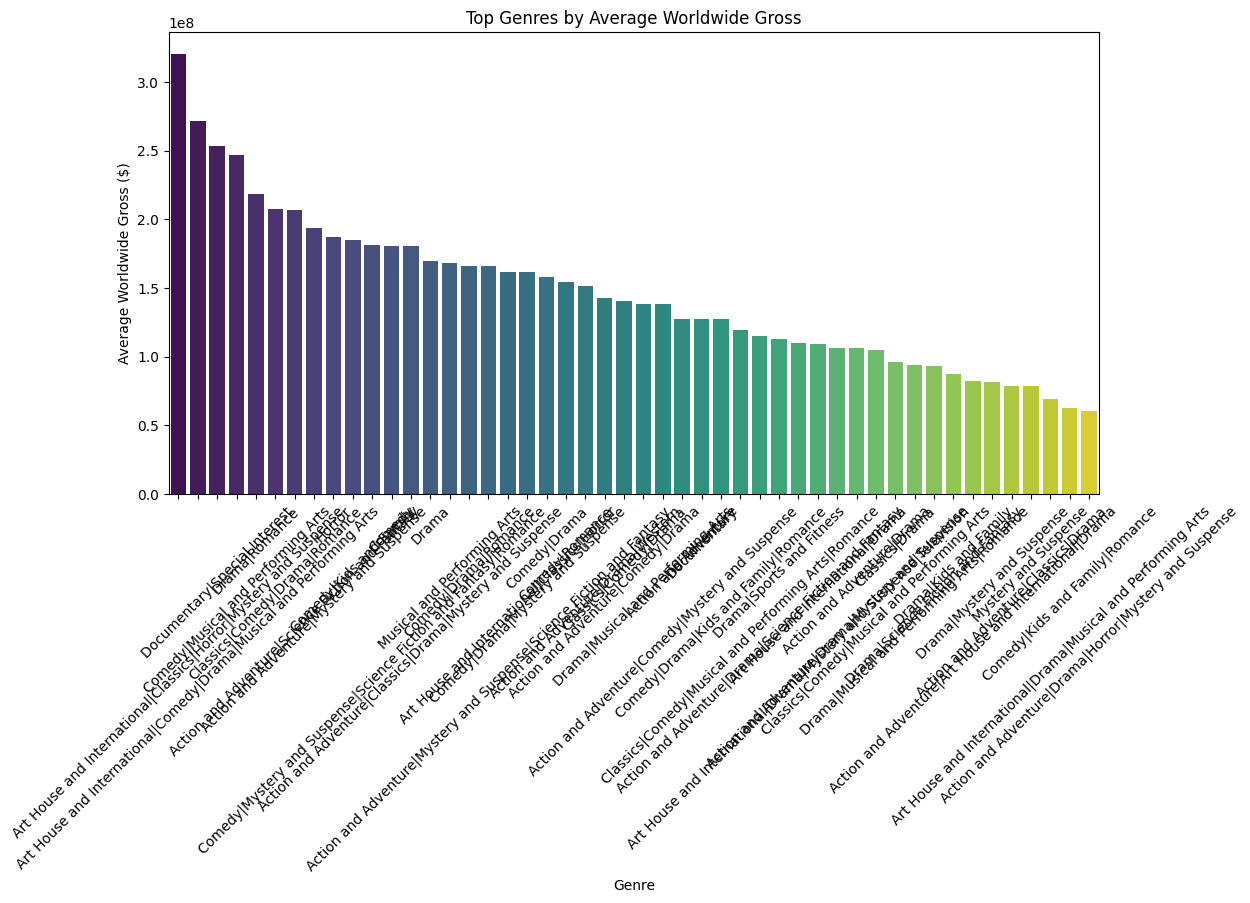

In [235]:
# Group by genre and calculate the average worldwide gross
genre_profit = final_movies.groupby('genre')['worldwide_gross'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=genre_profit.index, y=genre_profit.values, palette='viridis')
plt.title('Top Genres by Average Worldwide Gross')
plt.xlabel('Genre')
plt.ylabel('Average Worldwide Gross ($)')
plt.xticks(rotation=45)
plt.show()


## Best release months
### Objective: Identify which months are the best for movie releases.

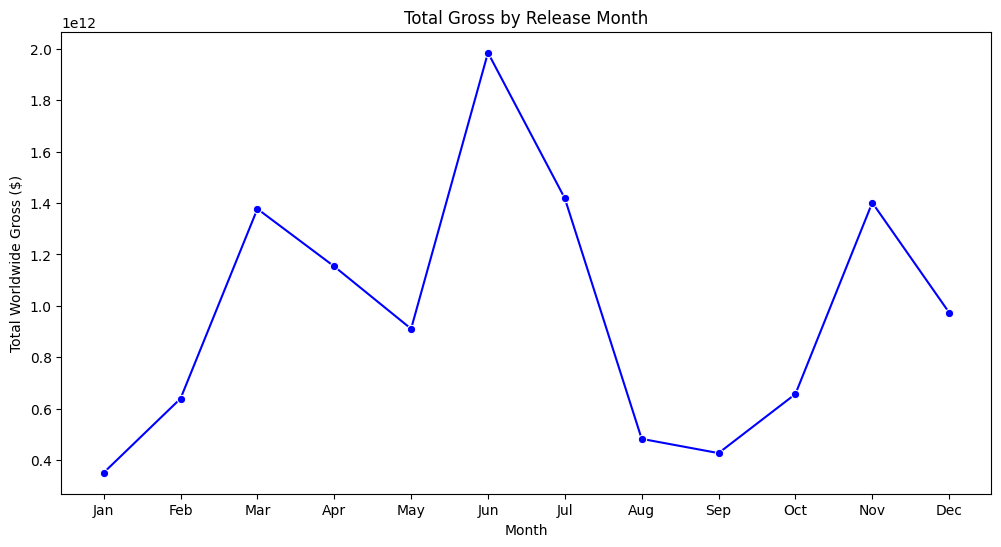

In [240]:
# Extract the month from the release_date
final_movies['release_month'] = pd.to_datetime(final_movies['release_date']).dt.month

# Group by release month and sum the worldwide gross
monthly_gross = final_movies.groupby('release_month')['worldwide_gross'].sum()

# Line chart
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_gross.index, y=monthly_gross.values, marker='o', color='blue')
plt.title('Total Gross by Release Month')
plt.xlabel('Month')
plt.ylabel('Total Worldwide Gross ($)')
plt.xticks(monthly_gross.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Budget vs revenue
### Objective: Analyze the relationship between production budget and worldwide revenue.

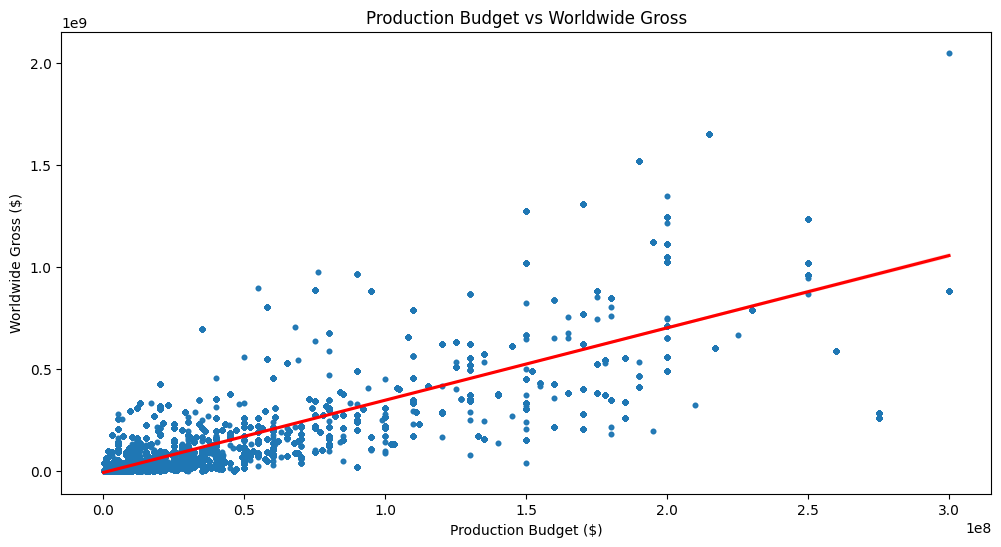

In [242]:
# Scatter plot with a trend line
plt.figure(figsize=(12,6))
sns.regplot(x='production_budget', y='worldwide_gross', data=final_movies, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()


## Domestic vs Foreign success
### Objective: Compare the success of movies in domestic vs foreign markets.

In [ ]:
# Add a new column to differentiate between Domestic and Foreign
final_movies['domestic_percentage'] = final_movies['domestic_gross_x'] / final_movies['worldwide_gross']
final_movies['foreign_percentage'] = final_movies['foreign_gross'] / final_movies['worldwide_gross']

# Create a stacked bar chart
final_movies[['domestic_percentage', 'foreign_percentage']].plot(kind='bar', stacked=True, figsize=(12,6), color=['blue', 'orange'])
plt.title('Domestic vs Foreign Success')
plt.xlabel('Movie')
plt.ylabel('Percentage of Worldwide Gross')
plt.xticks(range(len(final_movies)), final_movies['title'], rotation=90)
plt.show()


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\matplotlib\transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\matplotlib\transforms.py:369: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\matplotlib\transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\matplotlib\transforms.py:369: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


## Runtime effect
### Objective: Explore how movie runtime affects worldwide earnings.

In [ ]:
# Group by rating and calculate the average worldwide gross
rating_profit = final_movies.groupby('rating_x')['worldwide_gross'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=rating_profit.index, y=rating_profit.values, palette='viridis')
plt.title('Movie Rating vs Average Worldwide Gross')
plt.xlabel('Movie Rating')
plt.ylabel('Average Worldwide Gross ($)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 7. Group actors by movie_id (since each movie can have many actors)
actors_grouped = actors_data.groupby('movie_id')['primary_name'].apply(lambda x: ', '.join(x)).reset_index()
actors_grouped = actors_grouped.rename(columns={'primary_name': 'actor_names'})

In [ ]:
# 8. Now combine everything together step-by-step
final_data = movie_data

# Merge director names
final_data = pd.merge(final_data, directors_data[['movie_id', 'director_name']], on='movie_id', how='left')

# Merge writer names
final_data = pd.merge(final_data, writers_data[['movie_id', 'writer_name']], on='movie_id', how='left')

# Merge actor names
final_data = pd.merge(final_data, actors_grouped, on='movie_id', how='left')

# 9. Select only the important columns you want
final_data = final_data[[
    'primary_title', 'start_year', 'genres', 'averagerating',
    'director_name', 'writer_name', 'actor_names'
]]

# 10. Rename for better clarity
final_data = final_data.rename(columns={
    'primary_title': 'movie_title',
    'start_year': 'year',
    'averagerating': 'average_rating'
})

# 11. Check the final result
print(final_data.head())